# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd

df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Trabaja las variables categóricas del dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [3]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [8]:
import numpy as np
np.sort(df['week'].unique())

array(['Fri', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed'], dtype=object)

In [7]:
le.classes_

array(['Fri', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['week_int'] = le.fit_transform(df['week'])
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5


In [9]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [11]:
my_week = {"Mon":0, "Tues":1, "Wed":2, "Thurs":3, "Fri":4, "Sat":5, "Sun":6}

df['week_int_new'] = df['week'].replace(my_week)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,week_int_new
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0,4
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2,5
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3,6
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5,1


In [17]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [21]:
df['autumn'] = np.where(df['month'].isin([10,11,12]), 1, 0)
df['winter'] = np.where(df['month'].isin([1,2,3]), 1, 0)
df['spring'] = np.where(df['month'].isin([4,5,6]), 1, 0)
df['summer'] = np.where(df['month'].isin([7,8,9]), 1, 0)

my_week = {10:1, 11:1, 12:1, 1:2, 2:2, 3:2, 4:3, 5:3, 6:3, 7:4, 8:4, 9:4}
df['season_int'] = df['month'].replace(my_week)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,week_int_new,autumn,winter,spring,summer,season_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0,4,0,1,0,0,2
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2,5,0,1,0,0,2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3,6,0,1,0,0,2
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,0,1,0,0,2
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5,1,0,1,0,0,2


<AxesSubplot:>

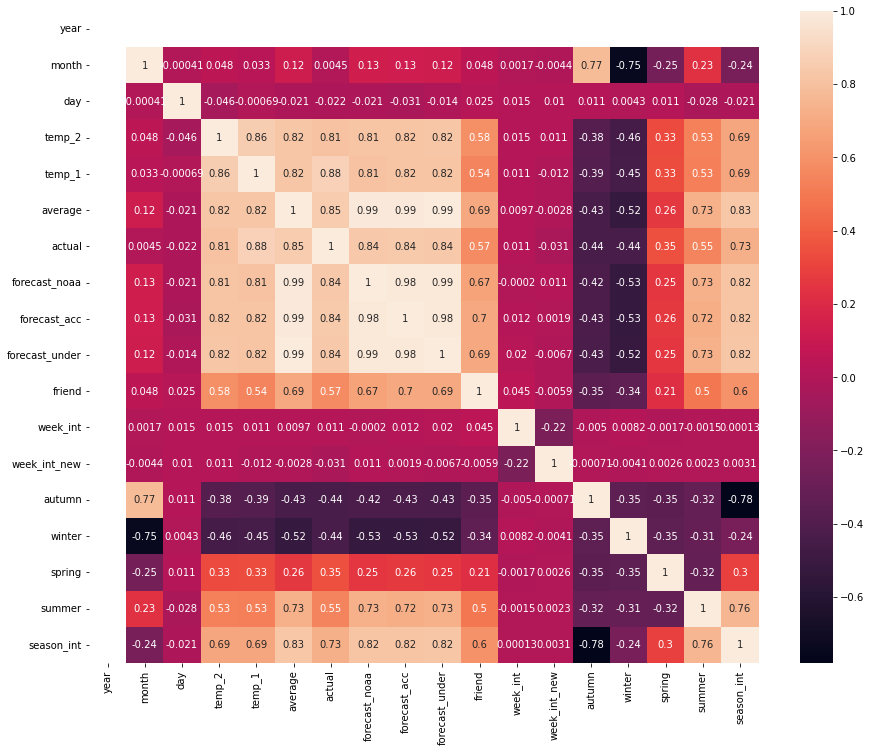

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))

sns.heatmap(df.corr(), annot=True)

### 3. Divide en train y test

In [24]:
from sklearn.model_selection import train_test_split

X = df[['temp_1', 'average', 'forecast_noaa', 'season_int']]
y = df['actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 4)
(70, 4)
(278,)
(70,)


### 4. Entrena el modelo


In [30]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
dtr.score(X_train, y_train)

1.0

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [28]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

y_pred = dtr.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.6698483726342213
MAE 5.0
MAPE 0.07944871712424048
MSE 39.02857142857143
RMSE 6.2472851246418575


### 6. Representa el árbol de decision

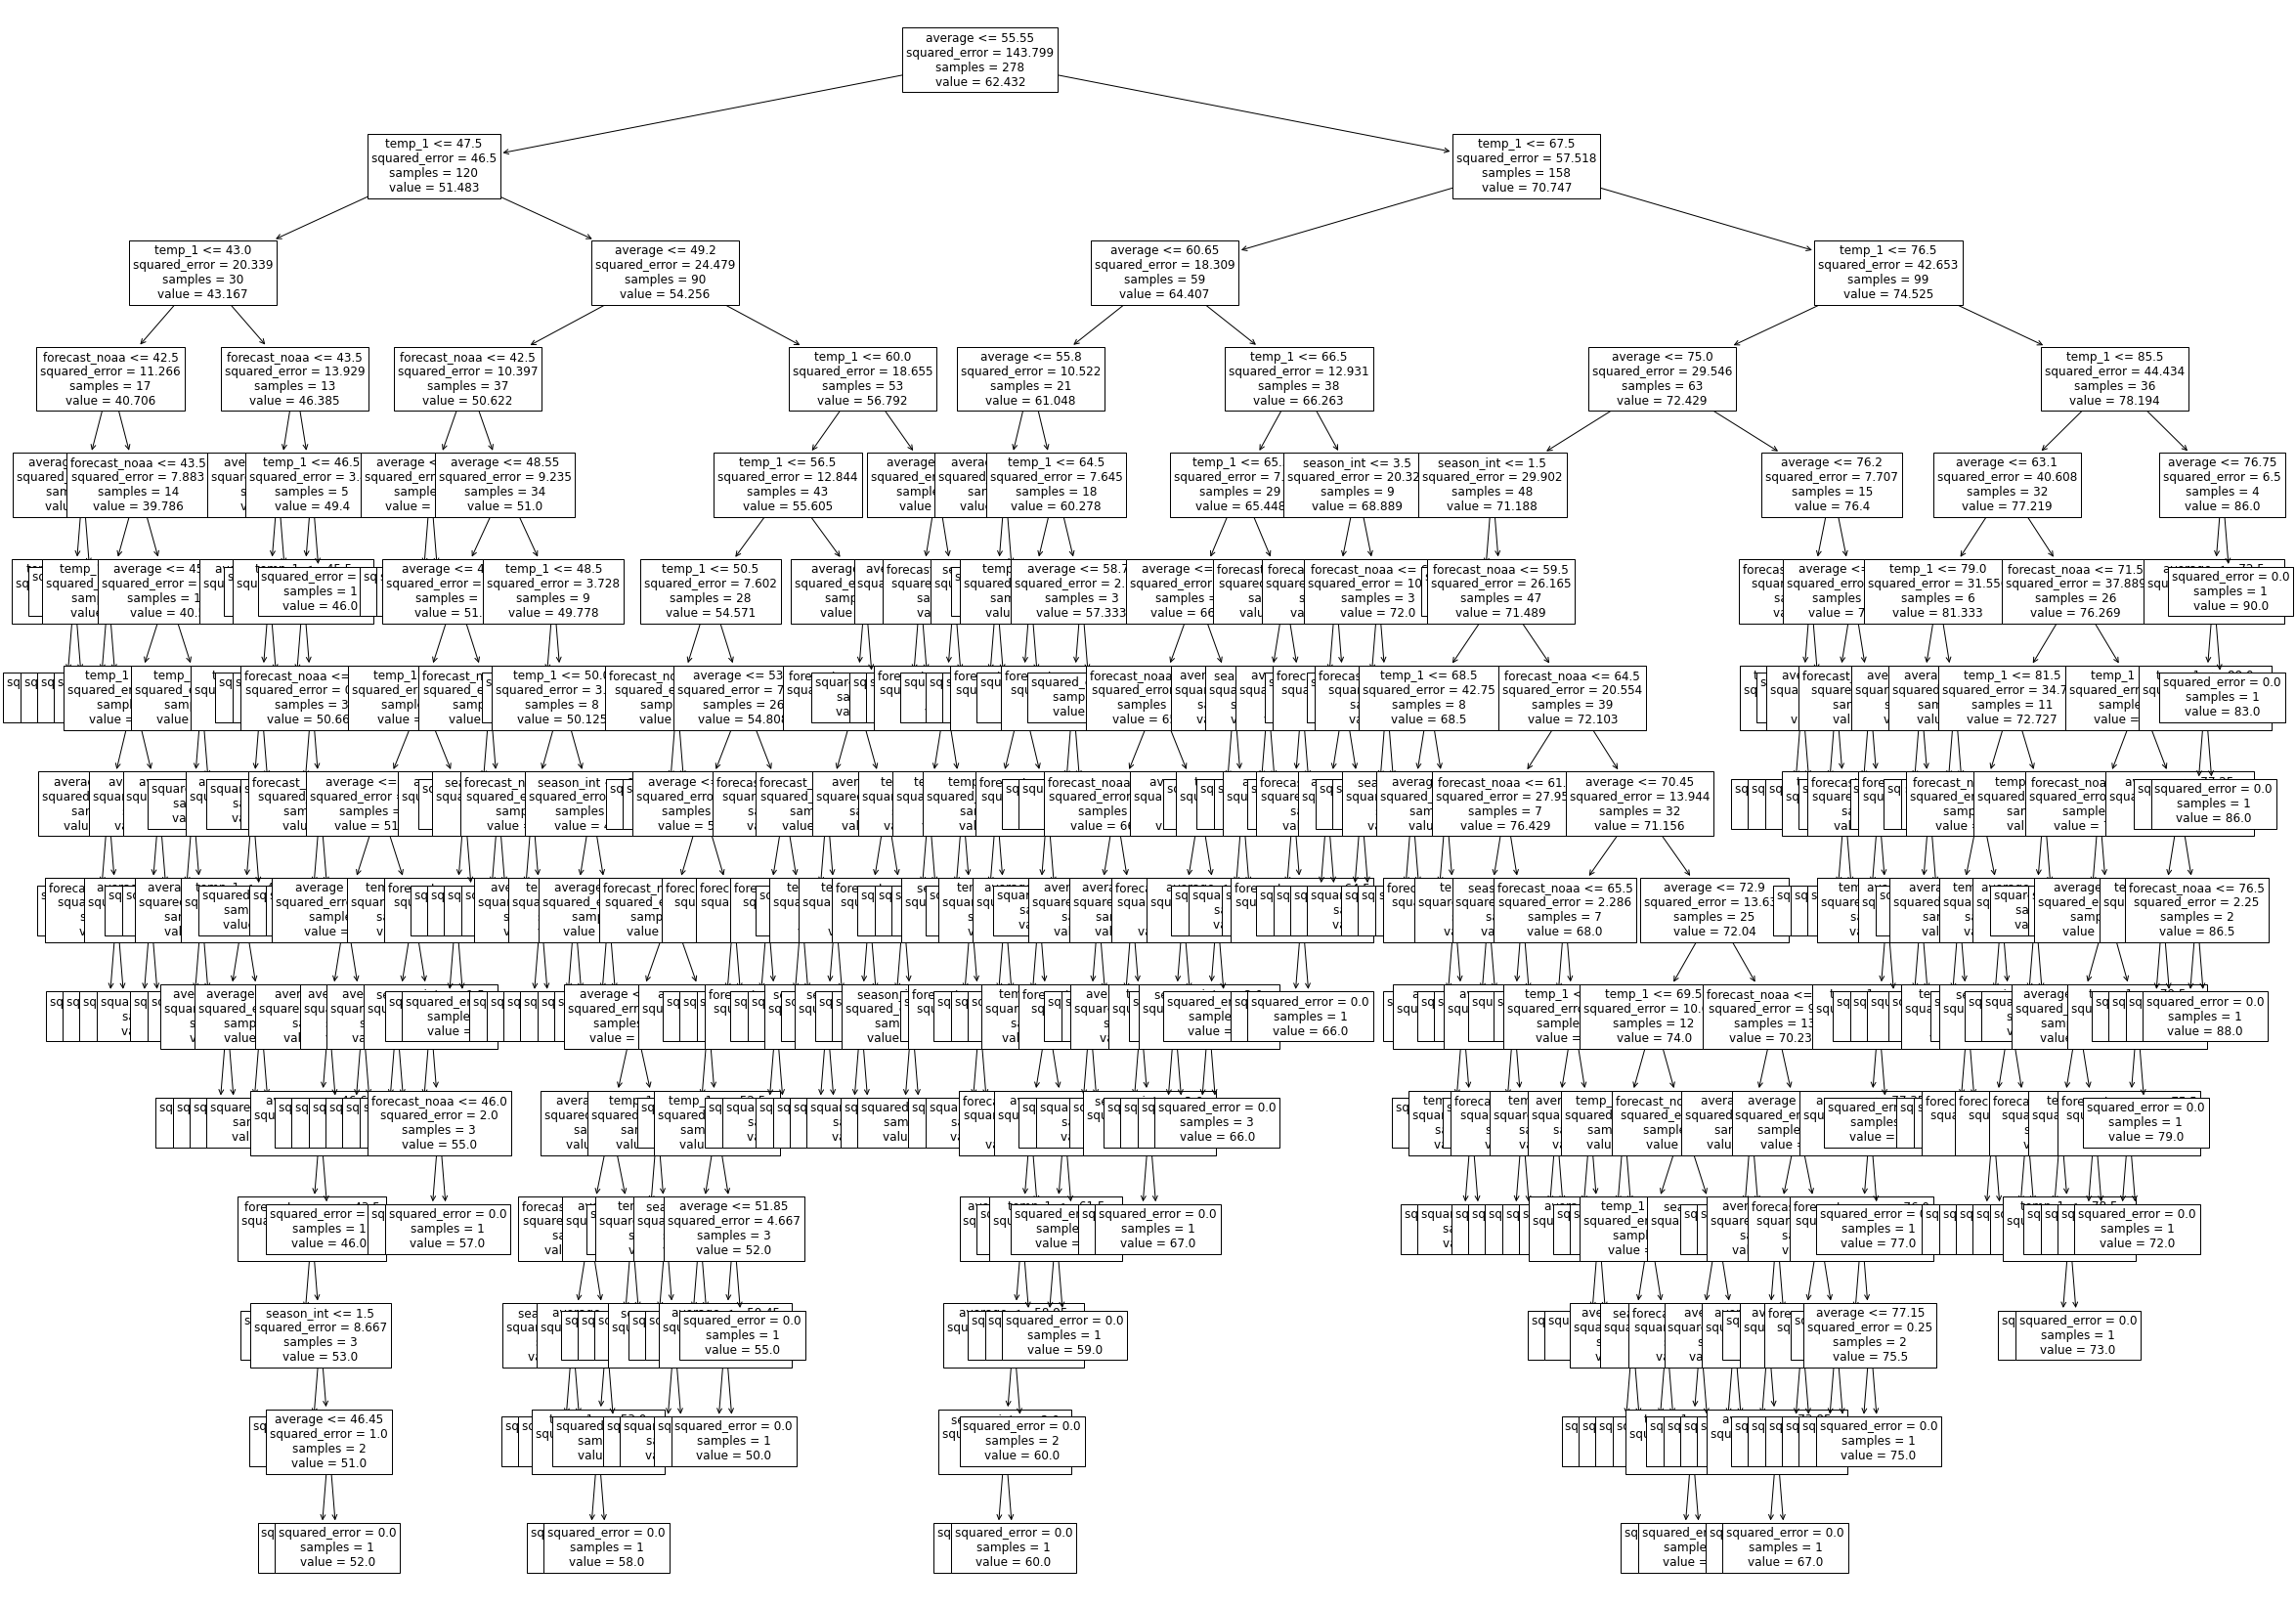

In [34]:
plt.figure(figsize=(40,30))
plot_tree(dtr, feature_names=X_train.columns, class_names="actual", fontsize=12);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [35]:
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [36]:
dtr.score(X_train, y_train)

0.8519265445954456

### 8. Vuelve a evaluar tu modelo

In [38]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

y_pred = dtr.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.7863337499184421
MAE 3.9329006213541358
MAPE 0.06314690057204479
MSE 25.25835952928415
RMSE 5.025769545978422


### 9. Vuelve a representar su árbol

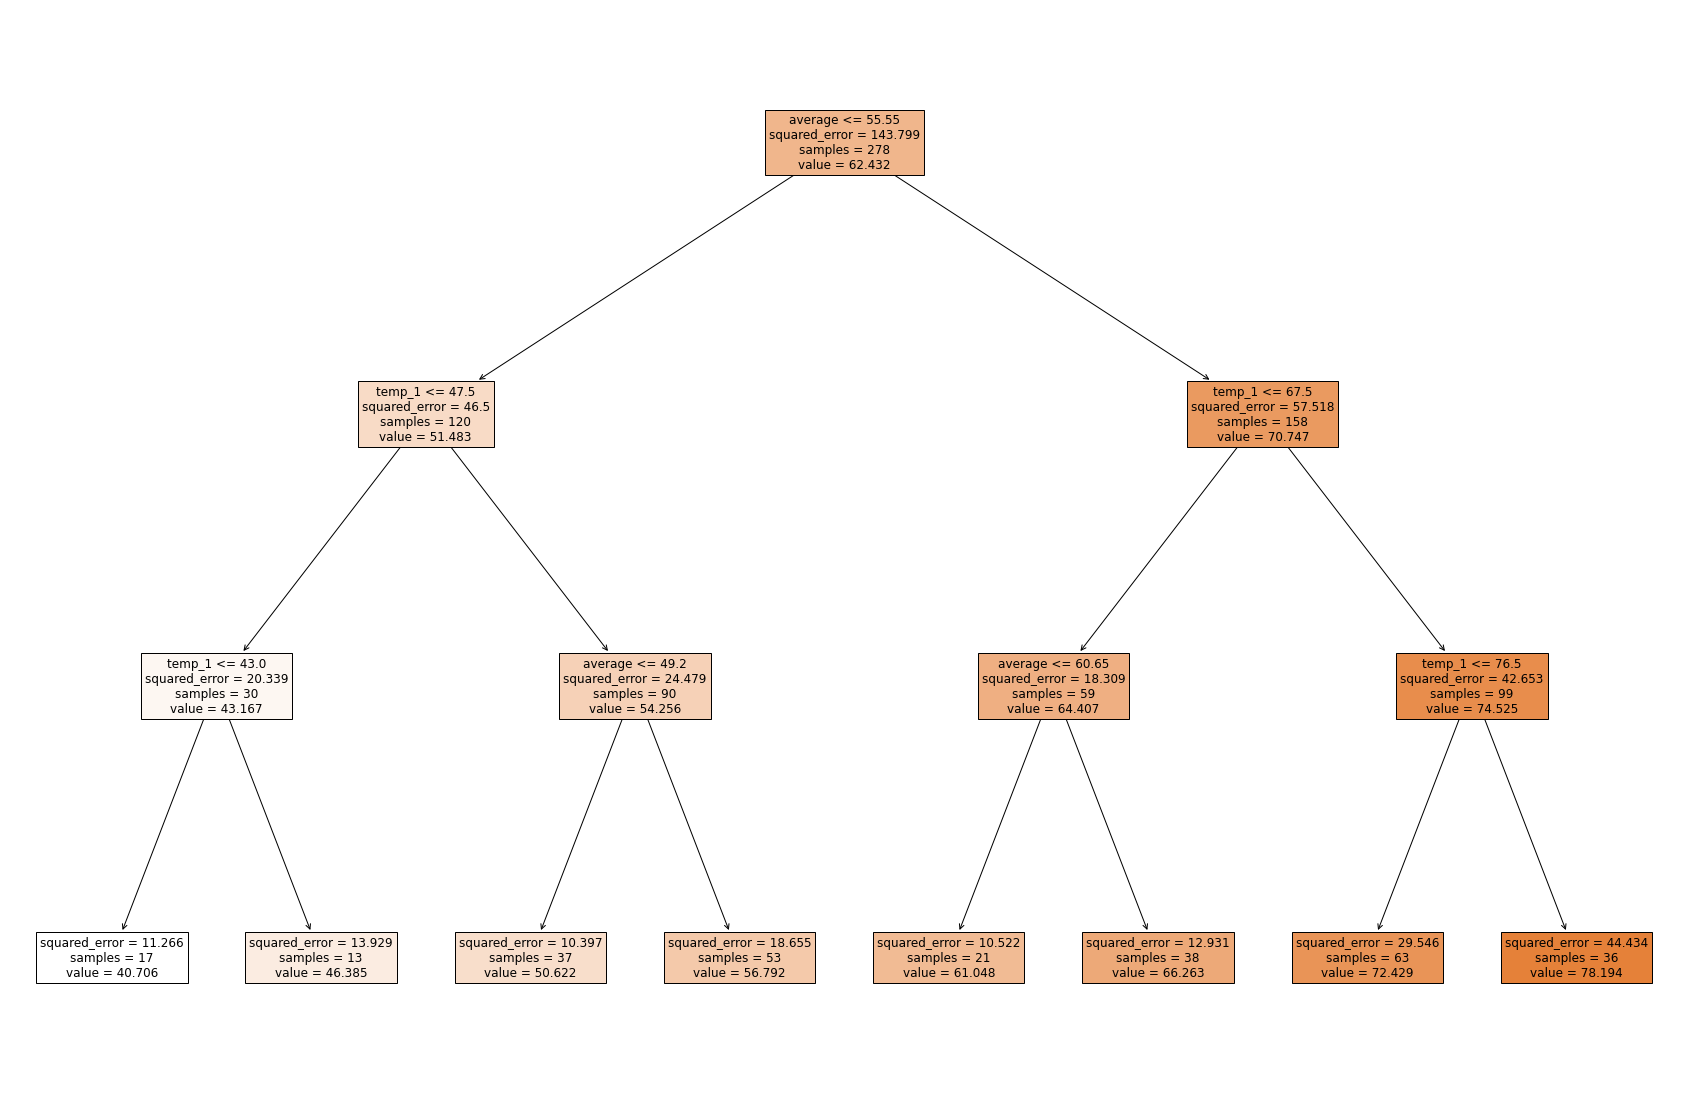

In [40]:
plt.figure(figsize=(30,20))
plot_tree(dtr, feature_names=X_train.columns, class_names="actual", fontsize=12, filled=True);

### 10. Utiliza un grid search con cross validation.

In [48]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

parameters = {"max_depth": [2,3,4,5],
              "criterion": ['squared_error', 'absolute_error'],
              "min_samples_split": [2,5,10,15],
              "min_samples_leaf": [2,4,6,8,10],
              "max_features": [1,2,3,4]          
             }

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [42]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='neg_mean_absolute_error')

In [43]:
dtr_gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [44]:
dtr_gs.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features=3, min_samples_leaf=10)

In [45]:
dtr_gs.best_score_

-3.8304229773533436

In [47]:
mean_absolute_error(y_test, dtr_gs.best_estimator_.predict(X_test))

4.118412614463034

In [53]:
dtr = DecisionTreeRegressor(max_depth=5, max_features=3, min_samples_leaf=10)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.7968726977279732
MAE 3.935732754640317
MAPE 0.06265775114737833
MSE 24.012507492605977
RMSE 4.900255859912416


In [50]:
dtr_gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='neg_mean_absolute_error')

In [51]:
dtr_gs.best_estimator_
# dtr_gs.best_estimator_.predict(X_test_kaggle)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4, max_features=1,
                      min_samples_leaf=4)

In [52]:
dtr_gs.best_score_

-4.212111801242235

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [55]:
dtr.feature_importances_

array([0.85837173, 0.05942066, 0.00333901, 0.07886859])

In [56]:
X_train.columns

Index(['temp_1', 'average', 'forecast_noaa', 'season_int'], dtype='object')

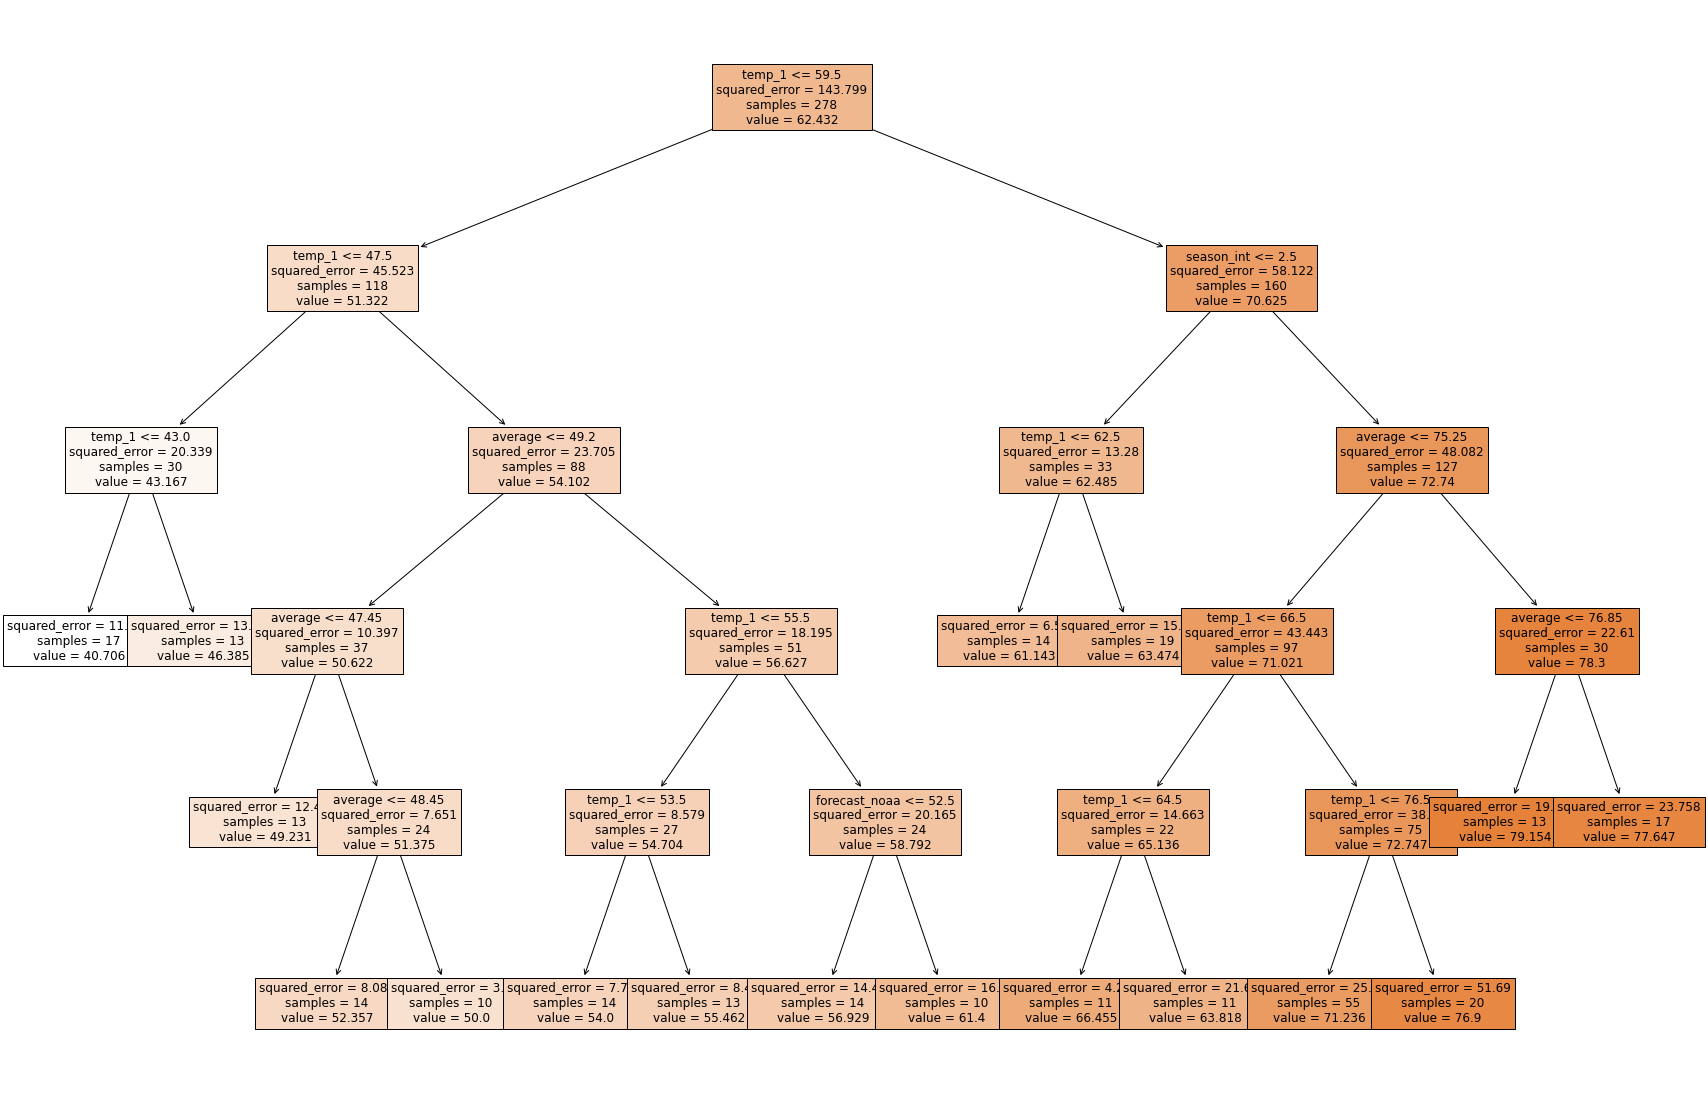

In [57]:
plt.figure(figsize=(30,20))
plot_tree(dtr, feature_names=X_train.columns, class_names="actual", fontsize=12, filled=True);

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [59]:
df['target'] = np.where(df['actual']>59, 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,week_int_new,autumn,winter,spring,summer,season_int,target
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0,4,0,1,0,0,2,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2,5,0,1,0,0,2,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3,6,0,1,0,0,2,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,0,1,0,0,2,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5,1,0,1,0,0,2,0


<AxesSubplot:>

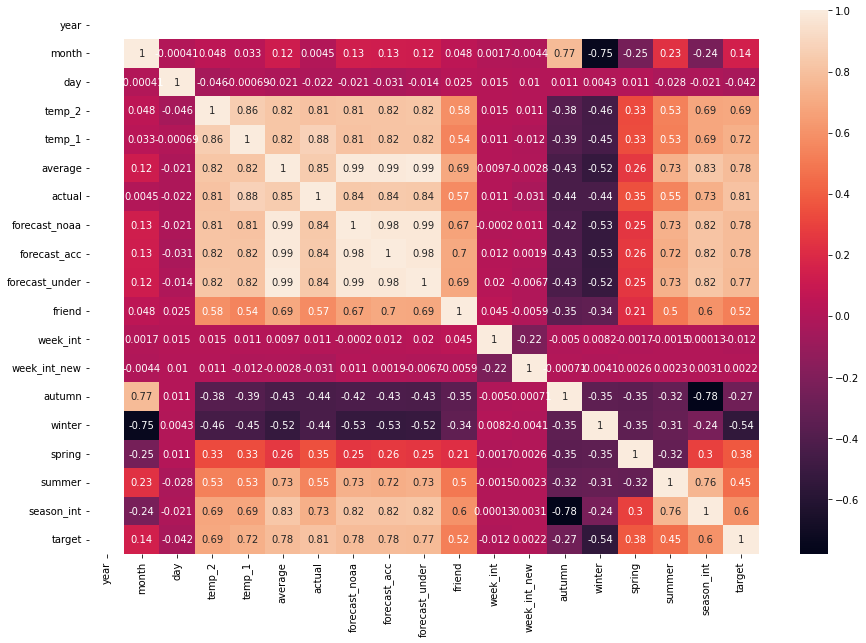

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [64]:
df['target'].value_counts(normalize=True)

1    0.586207
0    0.413793
Name: target, dtype: float64

In [84]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
343    0
344    0
345    0
346    0
347    0
Name: target, Length: 348, dtype: int32

In [92]:
X = df[['temp_1','average','season_int']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 3)
(70, 3)
(278,)
(70,)


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [95]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
y_pred_prob = dtc.predict_proba(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))
# print("MAE", confusion_matrix(y_test, y_pred))
print("AUC", roc_auc_score(y_test, y_pred_prob[:,1]))

Accuracy 0.8571428571428571
AUC 0.8371598639455783


### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model = RandomForestClassifier()

parameters = {"n_estimators": [50,100,150,200],
              "max_depth": [2,3,4,5],
              "criterion": ['squared_error', 'absolute_error'],
              "min_samples_split": [2,5,10,15],
              "min_samples_leaf": [2,4,6,8,10],
              "max_features": [1,2,3,4]          
             }

rfc_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [103]:
rfc_gs.fit(X_train, y_train)

KeyboardInterrupt: 